In [18]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, balanced_accuracy_score

In [2]:
# Loading the dataset
df = pd.read_csv("data.csv")
df.head()

,Cancer stage,Clump thickness,No of week,Clump thickness_new,No of week_new,True cancer stage
0,1.0,10.510076,6.166544,10.269649,11.999203,1
1,1.0,11.739776,7.024066,10.494287,6.495638,1
2,1.0,7.857070,5.909366,8.516879,7.102108,1
3,1.0,10.817929,5.920890,8.979736,9.196251,1
4,1.0,10.302407,6.984937,9.553005,7.120283,1


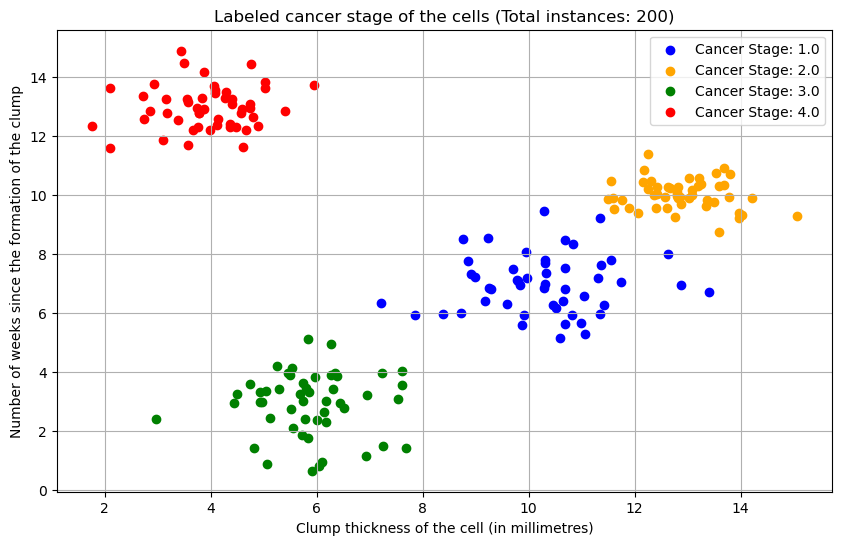

In [3]:
# Creating a scatter plot for 200 datapoints
plt.figure(figsize=(10,6))
plt.xlabel('Clump thickness of the cell (in millimetres)')
plt.ylabel('Number of weeks since the formation of the clump')
plt.title('Labeled cancer stage of the cells (Total instances: 200)')

# Creating separate lists for colors, markers and labels to show the legend
colors = ['blue', 'orange', 'green', 'red']
markers = ['o', 'o', 'o', 'o']
labels = [f'Cancer Stage: {i+1}.0' for i in range(4)]

for i in range(4):
    stage_data = df[df['Cancer stage'] == i+1]
    plt.scatter(stage_data['Clump thickness'], stage_data['No of week'], color=colors[i], marker=markers[i], label=labels[i])

plt.legend()
plt.grid(True)
plt.show()

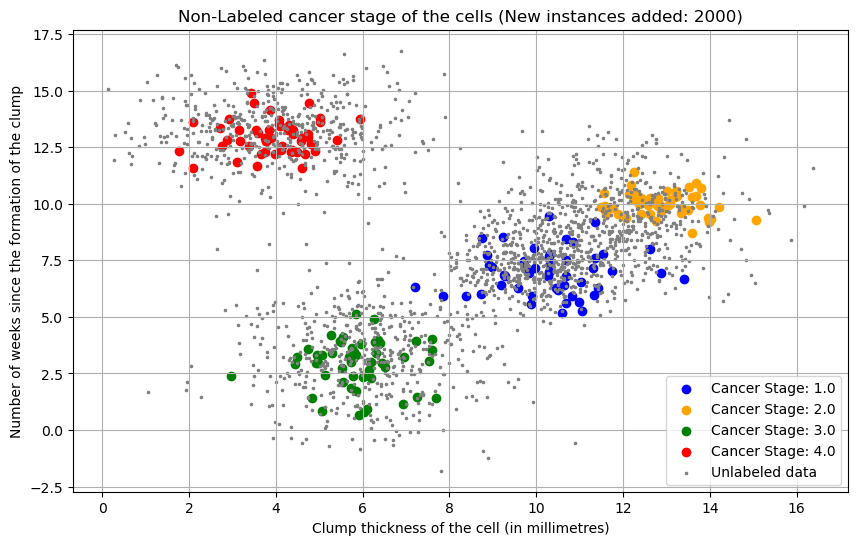

In [4]:
# Overlaying the above scatter plot with new unlabeled 2000 datapoints
plt.figure(figsize=(10,6))
plt.xlabel('Clump thickness of the cell (in millimetres)')
plt.ylabel('Number of weeks since the formation of the clump')
plt.title('Non-Labeled cancer stage of the cells (New instances added: 2000)')

colors = ['blue', 'orange', 'green', 'red']
markers = ['o', 'o', 'o', 'o']
labels = [f'Cancer Stage: {i+1}.0' for i in range(4)]

for i in range(4):
    stage_data = df[df['Cancer stage'] == i+1]
    plt.scatter(stage_data['Clump thickness'], stage_data['No of week'], color=colors[i], marker=markers[i], label=labels[i])
    
plt.scatter(df['Clump thickness_new'], df['No of week_new'], color='grey', marker='.', s=10, label='Unlabeled data')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\ramam\anaconda3\Lib\site-packages\sklearn\semi_supervised\_self_training.py:214: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)
C:\Users\ramam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SelfTrainingClassifier was fitted with feature names
  warnings.warn(


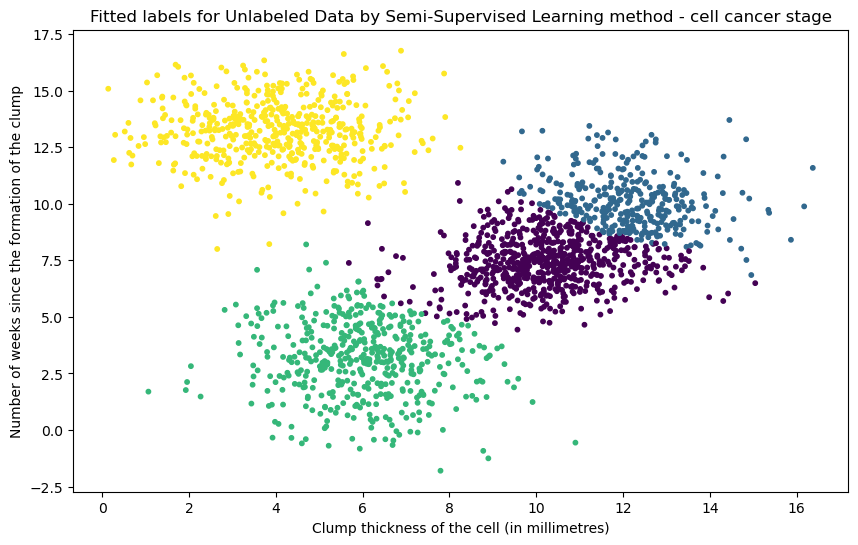

In [13]:
# Preparing labeled data and dropping rows with NaN values
X_labeled = df[['Clump thickness', 'No of week']].dropna()
y_labeled = df['Cancer stage'].dropna()

# Preparing new (unlabeled) data
X_unlabeled = df[['Clump thickness_new', 'No of week_new']].values

# Creating the SelfTrainingClassifier with KNN as base estimator as specified
knn = KNeighborsClassifier(n_neighbors=5)
self_training_model = SelfTrainingClassifier(knn)

# Training the model using only the labeled data
self_training_model.fit(X_labeled, y_labeled)

# Predicting the class labels for the new 2000 datapoints
predicted_labels = self_training_model.predict(X_unlabeled)

# Plotting the predicted labels for the new datapoints
plt.figure(figsize=(10,6))
scatter_new = plt.scatter(df['Clump thickness_new'], df['No of week_new'], c=predicted_labels, s=10, cmap='viridis')
plt.xlabel('Clump thickness of the cell (in millimetres)')
plt.ylabel('Number of weeks since the formation of the clump')
plt.title('Fitted labels for Unlabeled Data by Semi-Supervised Learning method - cell cancer stage')
plt.show()

Accuracy: 0.8905

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.98      0.82       500
           2       0.96      0.65      0.77       500
           3       1.00      0.94      0.97       500
           4       0.99      1.00      1.00       500

    accuracy                           0.89      2000
   macro avg       0.92      0.89      0.89      2000
weighted avg       0.92      0.89      0.89      2000


Confusion Matrix:
 [[488  12   0   0]
 [177 323   0   0]
 [ 26   0 471   3]
 [  1   0   0 499]]


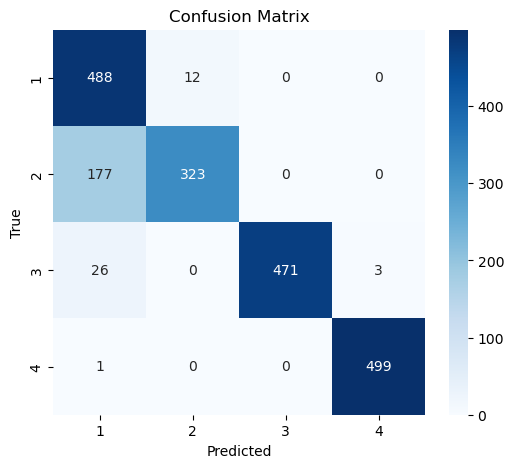

In [23]:
true_labels = df['True cancer stage']

# Computing and printing accuracy, classification report, confusion matrix
acc = accuracy_score(true_labels, predicted_labels)
report = classification_report(true_labels, predicted_labels)
conf_mat = confusion_matrix(true_labels, predicted_labels)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_mat)


plt.figure(figsize=(6,5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Report

### 1. Provide three applications of Semi-supervised learning. 
Ans. Three applications of Semi-supervised learning are:
i) Video Recommendation System - Semi-supervised learning is a great approach to predict based on some labels about what all kinds of information does a YouTube video entail.

ii) Search Engines -  Many search engines apply semi-supervised learning to their ranking component to better understand human 
language and the relevance of search results to queries.

iii) Text Document Classification - Semi-supervised learning allows us to give pseudo-labels to lots and lots of data before the data could be fed to the deep neural networks for classification.

### 2. What are the three assumptions of Semi-supervised learning?  
Ans. Three assumptions of semi-supervised learning are as follows:
i) Continuity Assumption- It is assumed that the points that are closer to each other are more likely to have the same output label.

ii) Clustering Assumption- It is assumed that the data can be divided into discrete clusters and points in the same cluster are more likely to share an output label.

iii) Manifold Assumption- It is assumed that the data lie approximately on a manifold of a much lower dimension than the input    space. This assumption allows the use of distances and densities which are defined on a manifold.

### 3. What is significance each of using the above three assumptions in Semi-supervised Learning? 
Ans. Significance of assumptions are as follows:
i)Smoothness Assumption: It helps ensure that small perturbations in input do not change the output significantly, leading to robust predictions.

ii)Cluster Assumption: It allows the model to generalize better by assuming that decision boundaries should lie in low-density regions, thereby reducing misclassifications.

iii)Manifold Assumption: It enables the learning algorithm to focus on the intrinsic geometry of the data, which can lead to more accurate classification by reducing the complexity of the data space.

### 4. How does the Co-training method differ from the Self-training method of Semi-supervised learning? Which one usually performs better for accuracy and such performance metrics? 
Ans. Co-training method differs from Self-training method by utilizing two classifiers instead of one (as in case of self-training method) so that we can get more confidence in the pseudo-labeling being done. It is observed that co-training technique has shown to work better than the self-training for various kinds of tasks such as web content classification, audio classification, etc since in co-training method, each classifier learns from the other one iteratively.

### 5. How to evaluate the performance of a semi-supervised learning method while training?
Ans. Since we are using Semi-supervised Learning methods to generate labels for classification, the same performance metrics for Supervised Learning apply here as well like accuracy, balanced accuracy, precision, confusion matrices, and classfication reports. Apart from these, we can also use the cross-validation on the labeled data to  assess how well our model generalizes.